## 1. 데이터 전처리 실험
* outlier detection
* missing imputation
* normalization

> 초기 데이터는 `numpy` 를 통해 Random 하게 확보 (이상치를 포함한 형태)

In [6]:
import numpy as np #라이러리를 불러온다.
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 결측치만 시각화하는 함수
def plot_missing_data(data):
    missing_mask = np.isnan(data)
    
    plt.figure(figsize=(12, 8))
    
    # 결측치 강조: 빨간색 마커로 표시
    plt.scatter(np.where(missing_mask)[0], np.zeros(np.sum(missing_mask)), color='red', label='Missing Data', s=100, edgecolor='black', alpha=0.8)
    
    plt.title('Missing Data', fontsize=18, weight='bold')
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# 이상치만 시각화하는 함수
def plot_outlier_data(data):
    outlier_mask = (data > 10)  # 이상치는 10을 넘는 값으로 가정
    
    plt.figure(figsize=(12, 8))
    
    # 이상치 강조: 노란색 마커로 표시
    plt.scatter(np.where(outlier_mask)[0], np.zeros(np.sum(outlier_mask)), color='yellow', label='Outliers', s=100, edgecolor='black', alpha=0.8)
    
    plt.title('Outliers', fontsize=18, weight='bold')
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# 일반 데이터만 시각화하는 함수
def plot_regular_data(data):
    plt.figure(figsize=(12, 8))
    
    for i in range(data.shape[1]):  # 각 feature에 대해
        plt.plot(data[:, i], marker='o', markersize=6, alpha=0.6, linewidth=2, color='lightgrey')

    plt.title('Regular Data', fontsize=18, weight='bold')
    plt.xlabel('Samples', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.tight_layout()
    plt.show()


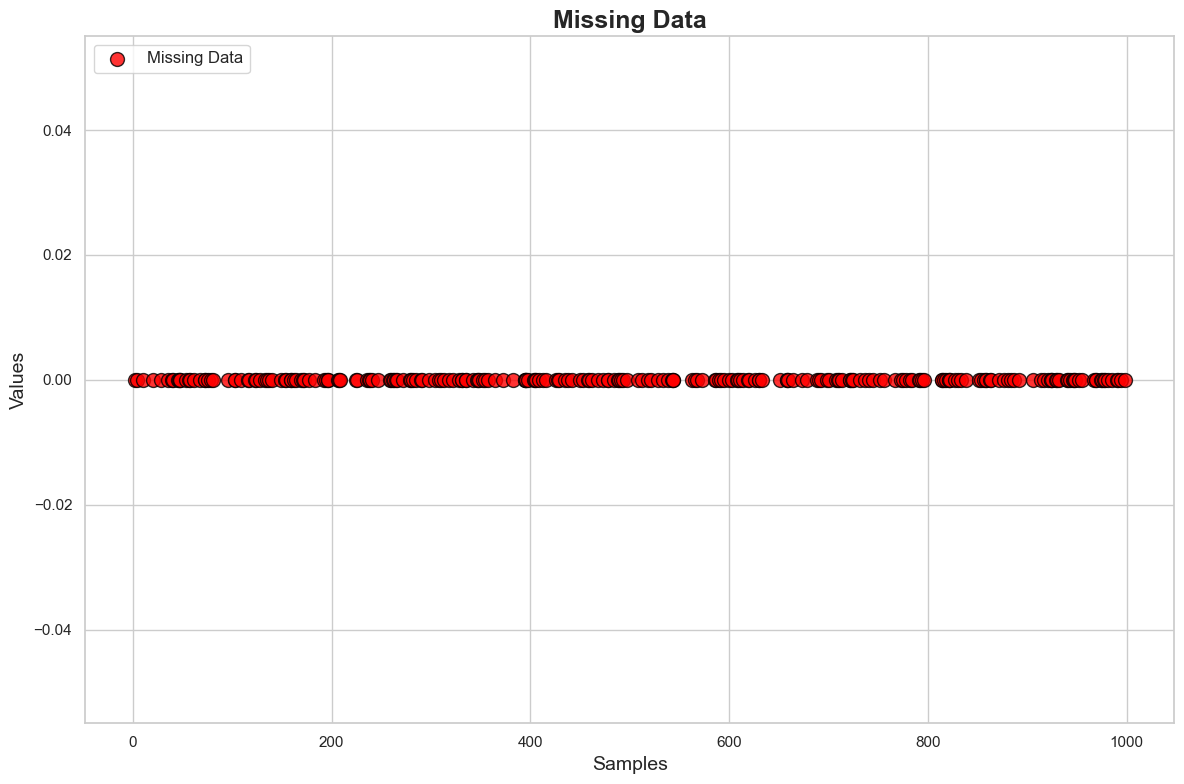

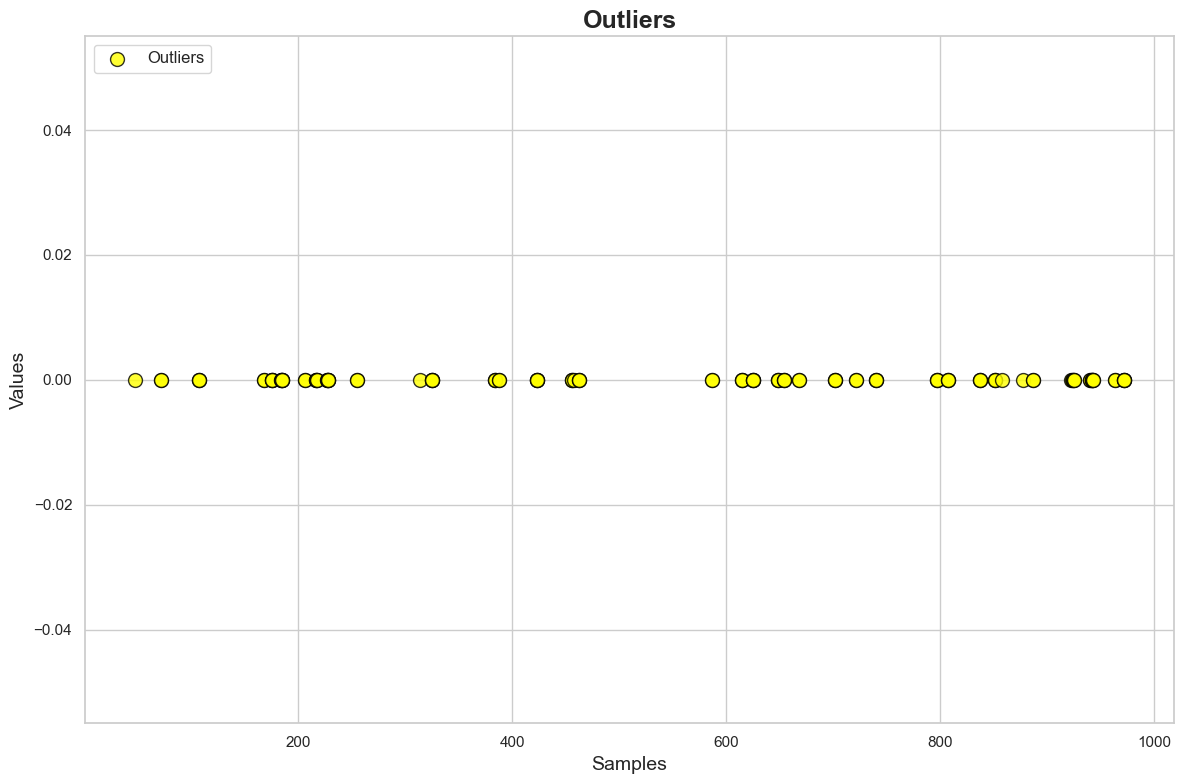

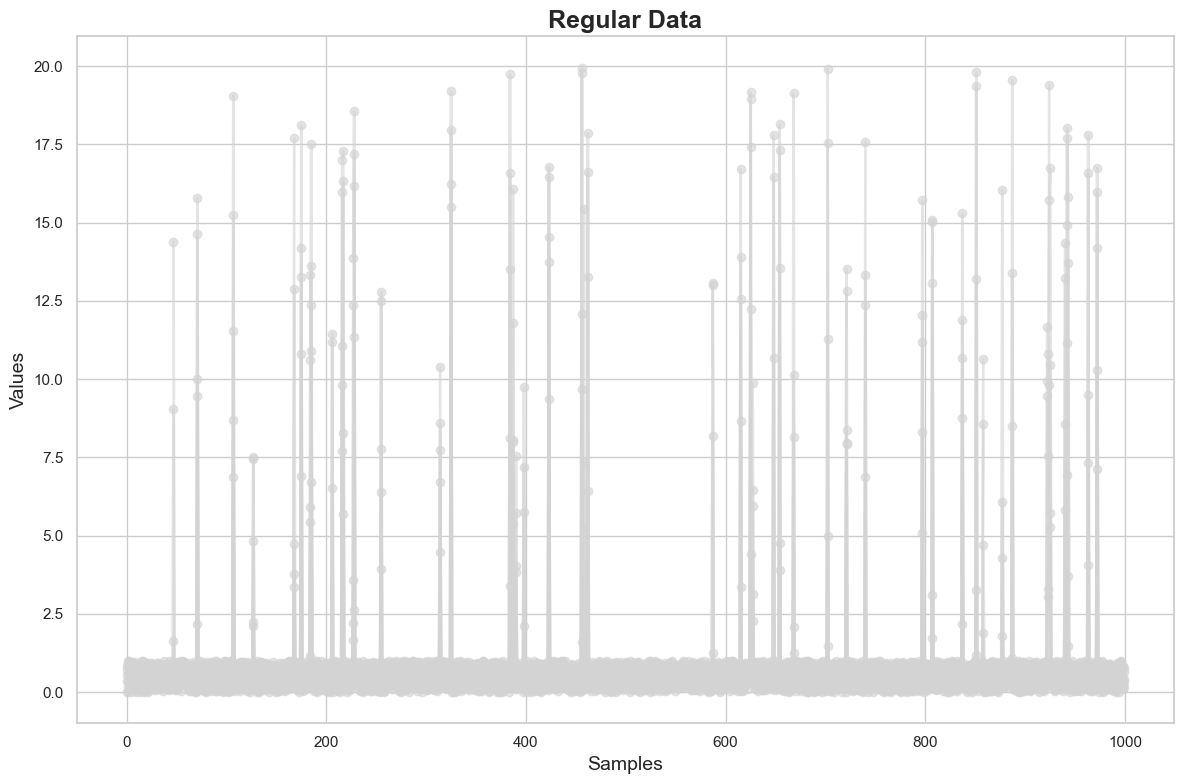

In [25]:
def generate_data(samples=1000, features=5, outlier_ratio=0.05):
    """
    랜덤 데이터 생성 함수입니다. 일부 데이터를 이상치로 설정합니다.
    
    Parameters:
    samples (int): 데이터 샘플 수
    features (int): 특성의 수
    outlier_ratio (float): 이상치 비율 (예: 0.05는 5%)
    
    Returns:
    numpy.ndarray: 랜덤 데이터 (이상치 포함)
    """
    data = np.random.rand(samples, features)
    
    # 이상치 생성: 일부 데이터를 인위적으로 10배로 증가시켜 이상치를 만듭니다.
    num_outliers = int(samples * outlier_ratio)
    outlier_indices = np.random.choice(samples, num_outliers, replace=False)
    data[outlier_indices] *= 20  # 이상치를 생성
    
    # 일부 데이터를 결측치로 설정
    missing_indices = np.random.choice(samples * features, int(samples * features * 0.05), replace=False)
    data = data.flatten()
    data[missing_indices] = np.nan  # 결측치 생성
    data = data.reshape(samples, features)
    
    return data

data = generate_data(samples=1000, features=5, outlier_ratio=0.05)
plot_missing_data(data)  # 결측치만
plot_outlier_data(data)  # 이상치만
plot_regular_data(data)  # 일반 데이터만

In [5]:
print(data)

[[           nan 6.68464354e+00 6.55442745e+00 7.85807093e+00
  4.06571452e+00]
 [9.60609791e-01 6.07562758e-01 8.48690723e-01 8.06414956e-01
  5.02596149e-03]
 [2.42234506e-01 2.31561217e-01 8.89124986e-01 5.87167255e-01
  7.62965636e-01]
 ...
 [6.00144646e-01 7.68907934e-01 6.75922499e-01 3.47429104e-02
  5.08353232e-01]
 [7.81523922e-01 4.50965583e-01 1.88273674e-01 2.71588563e-01
  5.19543512e-02]
 [7.47453001e-01 9.18329032e-01 4.37937965e-01 1.78265348e-01
  5.32499514e-01]]
